# Eksploratory Data Analysis

**Import Library**

In [41]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

## Load Data

In [3]:
# Load JSON
df = pd.read_json("mobil_500_page.json")

# Fungsi untuk menghapus list, ambil elemen pertama jika isinya list
def remove_list(x):
    if isinstance(x, list) and len(x) > 0:
        return x[0]
    return x

# Terapkan ke semua kolom
df_cleaned = df.applymap(remove_list)

# Cek hasil
df_cleaned.head()


C:\Users\acer\AppData\Local\Temp\ipykernel_5656\2336176701.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(remove_list)


,nama_product,link_product,harga,km,transmisi,lokasi,penjual,nama_mobil
0,\n 2021 Jeep Wrangler 2.0 Rubicon SUV,https://www.mobil123.com/dijual/jeep-wrangler-...,1.655000e+09,35 - 40K KM,Automatic,DKI Jakarta,Dealer,NaN
1,\n 2022 Mitsubishi Xpander Cross 1.5 Pr...,https://www.mobil123.com/dijual/mitsubishi-xpa...,2.450000e+08,20 - 25K KM,Automatic,DKI Jakarta,Dealer,NaN
2,\n 2013 Honda Jazz 1.5 RS Hatchback,https://www.mobil123.com/dijual/honda-jazz-rs-...,1.530000e+08,0 - 5K KM,Manual,Jawa Timur,Dealer,Honda Jazz
3,\n 2020 Toyota Fortuner 2.4 VRZ 4X2 SUV...,https://www.mobil123.com/dijual/toyota-fortune...,3.690000e+08,55 - 60K KM,Automatic,DKI Jakarta,Dealer,Toyota Fortuner
4,\n 2024 Toyota Raize 1.2 G (1 Tone) SUV...,https://www.mobil123.com/dijual/toyota-raize-g...,1.970000e+08,0 - 5K KM,Automatic,DKI Jakarta,Dealer,NaN


## Data Inspection

In [6]:
df_cleaned.sample(10)

,nama_product,link_product,harga,km,transmisi,lokasi,penjual,nama_mobil
2035,\n 2021 Honda Brio 1.2 Satya E Hatchbac...,https://www.mobil123.com/dijual/honda-brio-sat...,1.450000e+08,35 - 40K KM,Automatic,DKI Jakarta,Dealer,Honda Brio
3750,\n 2014 Honda City 1.5 E Sedan - LOW KM...,https://www.mobil123.com/dijual/honda-city-e-d...,1.420000e+08,125 - 130K KM,Automatic,DKI Jakarta,Sales Agent,Honda City
10029,\n 2021 Toyota Fortuner 2.4 VRZ 4X2 SUV...,https://www.mobil123.com/dijual/toyota-fortune...,3.850000e+08,90 - 95K KM,Automatic,DKI Jakarta,Dealer,Toyota Fortuner
77,\n 2021 Honda Brio 1.2 RS Hatchback,https://www.mobil123.com/dijual/honda-brio-rs-...,1.670000e+08,55 - 60K KM,Automatic,DKI Jakarta,Dealer,Honda Brio
3008,\n 2021 Toyota Avanza 1.5 G TSS MPV,https://www.mobil123.com/dijual/toyota-avanza-...,1.980000e+08,55 - 60K KM,Automatic,DKI Jakarta,Dealer,Toyota Avanza
3274,\n 2018 Toyota Vellfire 2.5 G MPV - IST...,https://www.mobil123.com/dijual/toyota-vellfir...,6.770000e+08,55 - 60K KM,Automatic,DKI Jakarta,Dealer,Toyota Vellfire
5265,\n 2023 Lexus LM 350h 2.5 4 Seater MPV,https://www.mobil123.com/dijual/lexus-lm-350h-...,2.350000e+09,0 - 5K KM,Automatic,DKI Jakarta,Dealer,NaN
4183,\n 2019 Mazda CX-5 2.5 Elite SUV,https://www.mobil123.com/dijual/mazda-cx-5-eli...,3.000000e+08,40 - 45K KM,Automatic,DKI Jakarta,Dealer,Mazda CX-5
441,\n 2021 Toyota Kijang Innova 2.0 G MPV ...,https://www.mobil123.com/dijual/toyota-kijang-...,2.770000e+08,50 - 55K KM,Automatic,DKI Jakarta,Sales Agent,Toyota Kijang Innova
10897,\n 2019 Toyota Kijang Innova 2.4 G MPV ...,https://www.mobil123.com/dijual/toyota-kijang-...,3.450000e+08,80 - 85K KM,Automatic,Jawa Barat,Sales Agent,Toyota Kijang Innova


In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nama_product  12500 non-null  object 
 1   link_product  12500 non-null  object 
 2   harga         11868 non-null  float64
 3   km            12500 non-null  object 
 4   transmisi     12500 non-null  object 
 5   lokasi        12500 non-null  object 
 6   penjual       12500 non-null  object 
 7   nama_mobil    9664 non-null   object 
dtypes: float64(1), object(7)
memory usage: 781.4+ KB


## Data Wrangling

In [7]:
# Contoh: df sudah dibersihkan dari list
# df['nama_product'] sudah dalam bentuk string biasa

# Ekstrak tahun (4 digit pertama)
df_cleaned['tahun'] = df_cleaned['nama_product'].str.extract(r'(\d{4})')

# Ekstrak merk (kata setelah tahun)
df_cleaned['merk'] = df_cleaned['nama_product'].str.extract(r'\d{4}\s+(\w+)')

# Ekstrak body type (MPV, SUV, Hatchback, Sedan, dll)
# Sesuaikan daftar jika ada variasi
body_types = ['MPV', 'SUV', 'Hatchback', 'Sedan', 'Convertible', 'Cabriolet', 'Pickup', 'Wagon', 'Coupe']

def extract_body_type(text):
    if isinstance(text, str):
        for bt in body_types:
            if bt.lower() in text.lower():
                return bt
    return None

df_cleaned['body_type'] = df_cleaned['nama_product'].apply(extract_body_type)

# Cek hasil
df_cleaned[['nama_product', 'tahun', 'merk', 'body_type']].head()


,nama_product,tahun,merk,body_type
0,\n 2021 Jeep Wrangler 2.0 Rubicon SUV,2021,Jeep,SUV
1,\n 2022 Mitsubishi Xpander Cross 1.5 Pr...,2022,Mitsubishi,MPV
2,\n 2013 Honda Jazz 1.5 RS Hatchback,2013,Honda,Hatchback
3,\n 2020 Toyota Fortuner 2.4 VRZ 4X2 SUV...,2020,Toyota,SUV
4,\n 2024 Toyota Raize 1.2 G (1 Tone) SUV...,2024,Toyota,SUV


In [9]:
df_cleaned['nama_mobil'].fillna('Unknown', inplace=True)
df_cleaned['body_type'].fillna('Unknown', inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_5656\4120586445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['nama_mobil'].fillna('Unknown', inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_5656\4120586445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

## Eksploratory Data Analysis

In [17]:
df = df_cleaned.copy()

# Matikan scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)

### Distribusi Harga

In [18]:
df['harga'].describe()

count          11,868
mean      347,397,333
std       419,075,296
min        25,000,000
25%       165,000,000
50%       229,000,000
75%       399,000,000
max     9,500,000,000
Name: harga, dtype: float64

In [23]:
df['harga'].mode()

0   215,000,000
Name: harga, dtype: float64

In [26]:
mean = df['harga'].mean()
std = df['harga'].std()
mean_min_std = df['harga'].mean() - df['harga'].std()
mean_plus_std = df['harga'].mean() + df['harga'].std()

print(f"Harga Mobil berada di sekitar nilai rata-rata yaitu: {mean:,.0f}")
print(f"Dengan standar deviasi yaitu: {std:,.0f} yaitu antara {mean_min_std:,.0f} sampai {mean_plus_std:,.0f} rupiah")

Harga Mobil berada di sekitar nilai rata-rata yaitu: 347,397,333
Dengan standar deviasi yaitu: 419,075,296 yaitu antara -71,677,963 sampai 766,472,629 rupiah


In [21]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 : {Q1:,.0f}")
print(f"Q3 : {Q3:,.0f}")
print(f"IQR: {IQR:,.0f}")


Q1 : 165,000,000
Q3 : 399,000,000
IQR: 234,000,000


<Axes: title={'center': 'Distribusi Harga'}, ylabel='Frequency'>

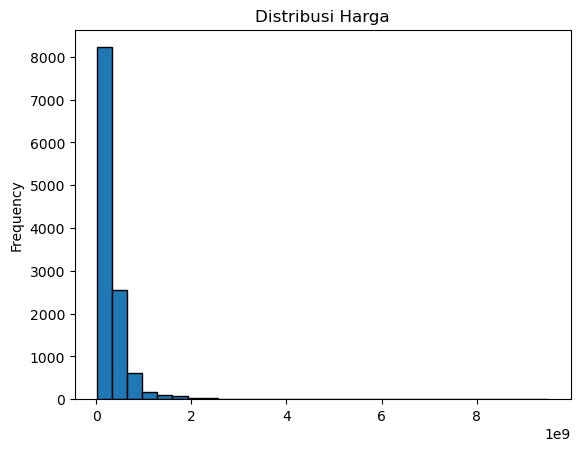

In [19]:
# Histogram dari kolom harga
df['harga'].plot(kind='hist', bins=30, edgecolor='black', title='Distribusi Harga')


<Axes: >

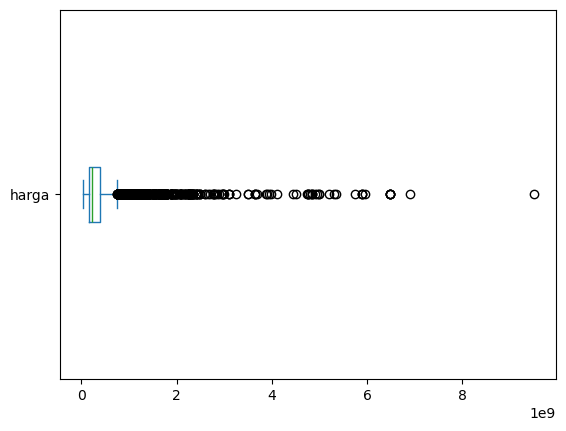

In [20]:
df['harga'].plot(kind='box', vert=False)

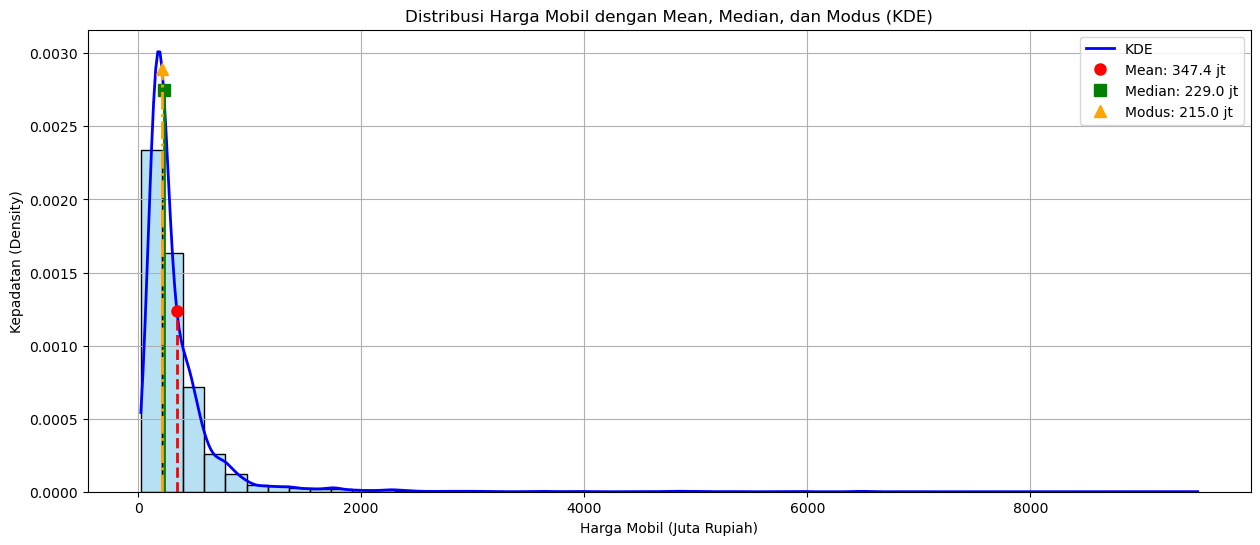

In [37]:
# Buang NaN & konversi ke juta rupiah
harga_juta = df['harga'].dropna() / 1_000_000

# Hitung statistik
mean_val = harga_juta.mean()
median_val = harga_juta.median()
mode_val = harga_juta.mode()[0]

# Hitung KDE
kde = gaussian_kde(harga_juta)
x_vals = np.linspace(harga_juta.min(), harga_juta.max(), 500)
y_vals = kde(x_vals)

# Ambil y pada posisi mean, median, modus
y_mean = kde(mean_val)[0]
y_median = kde(median_val)[0]
y_mode = kde(mode_val)[0]

# Plot histogram density + KDE
plt.figure(figsize=(15,6))
sns.histplot(harga_juta, bins=50, stat="density", color='skyblue', edgecolor='black', alpha=0.6)
plt.plot(x_vals, y_vals, color='blue', linewidth=2, label="KDE")

# Garis + marker di titik KDE
plt.plot([mean_val, mean_val], [0, y_mean], color='red', linestyle='--', linewidth=2)
plt.plot(mean_val, y_mean, 'o', color='red', markersize=8, label=f'Mean: {mean_val:,.1f} jt')

plt.plot([median_val, median_val], [0, y_median], color='green', linestyle='-', linewidth=2)
plt.plot(median_val, y_median, 's', color='green', markersize=8, label=f'Median: {median_val:,.1f} jt')

plt.plot([mode_val, mode_val], [0, y_mode], color='orange', linestyle='-.', linewidth=2)
plt.plot(mode_val, y_mode, '^', color='orange', markersize=8, label=f'Modus: {mode_val:,.1f} jt')

# Label dan judul
plt.xlabel('Harga Mobil (Juta Rupiah)')
plt.ylabel('Kepadatan (Density)')
plt.title('Distribusi Harga Mobil dengan Mean, Median, dan Modus (KDE)')
plt.legend()
plt.grid(True)
plt.show()


## Harga VS Tahun

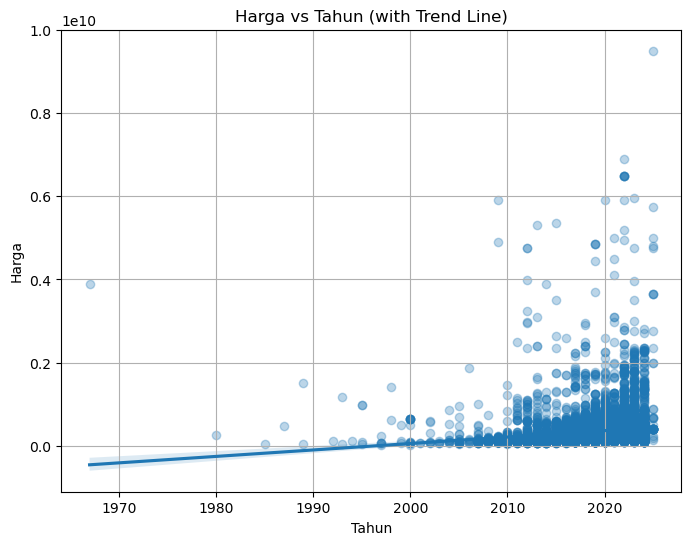

In [40]:

# Pastikan kolom tahun & harga jadi numerik
df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce')
df['harga'] = pd.to_numeric(df['harga'], errors='coerce')

# Buang baris yang NaN setelah konversi
df_clean = df.dropna(subset=['tahun', 'harga'])

# Plot regresi
plt.figure(figsize=(8,6))
sns.regplot(
    x='tahun',
    y='harga',
    data=df_clean,
    scatter_kws={'alpha':0.3}
)
plt.title('Harga vs Tahun (with Trend Line)')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.grid(True)
plt.show()


## Data Prep For Regression Modelling

In [42]:
df_reg = df.copy()

In [43]:
df_reg.drop(columns=['nama_product', 'link_product'], inplace=True)

In [44]:
df_reg = df_reg.dropna(subset=['harga'])

In [69]:
df_reg['tahun'] = pd.to_numeric(df_reg['tahun'], errors='coerce')

In [48]:
def extract_km_min_max(km_str):
    if isinstance(km_str, str):
        # Ambil semua angka
        nums = re.findall(r'\d+', km_str)
        nums = [int(n) * 1000 for n in nums]  # Konversi ke ribuan
        if len(nums) == 2:
            return pd.Series({'km_min': nums[0], 'km_max': nums[1]})
        elif len(nums) == 1:
            return pd.Series({'km_min': nums[0], 'km_max': nums[0]})
    return pd.Series({'km_min': np.nan, 'km_max': np.nan})


In [49]:
df_reg[['km_min', 'km_max']] = df_reg['km'].apply(extract_km_min_max)

In [50]:
df_reg

,harga,km,transmisi,lokasi,penjual,nama_mobil,tahun,merk,body_type,km_min,km_max
0,"1,655,000,000",35 - 40K KM,Automatic,DKI Jakarta,Dealer,Unknown,2021,Jeep,SUV,35000,40000
1,"245,000,000",20 - 25K KM,Automatic,DKI Jakarta,Dealer,Unknown,2022,Mitsubishi,MPV,20000,25000
2,"153,000,000",0 - 5K KM,Manual,Jawa Timur,Dealer,Honda Jazz,2013,Honda,Hatchback,0,5000
3,"369,000,000",55 - 60K KM,Automatic,DKI Jakarta,Dealer,Toyota Fortuner,2020,Toyota,SUV,55000,60000
4,"197,000,000",0 - 5K KM,Automatic,DKI Jakarta,Dealer,Unknown,2024,Toyota,SUV,0,5000
...,...,...,...,...,...,...,...,...,...,...,...
12495,"215,000,000",10 - 15K KM,Automatic,DKI Jakarta,Dealer,Suzuki XL7,2023,Suzuki,SUV,10000,15000
12496,"215,000,000",10 - 15K KM,Automatic,DKI Jakarta,Dealer,Suzuki XL7,2023,Suzuki,SUV,10000,15000
12497,"262,000,000",70 - 75K KM,Automatic,DKI Jakarta,Dealer,Unknown,2022,Hyundai,SUV,70000,75000
12498,"148,000,000",80 - 85K KM,Automatic,Banten,Dealer,Toyota Avanza,2017,Toyota,MPV,80000,85000


In [51]:
categorical_cols = ['merk', 'body_type', 'transmisi', 'lokasi', 'penjual']

# One-hot encoding
df_reg = pd.get_dummies(df_reg, columns=categorical_cols, drop_first=True)


In [52]:
df_reg

,harga,km,nama_mobil,tahun,km_min,km_max,merk_Audi,merk_BMW,merk_BYD,merk_Bentley,...,lokasi_Nangroe Aceh Darussalam,lokasi_Riau,lokasi_Sulawesi Selatan,lokasi_Sumatera Barat,lokasi_Sumatera Selatan,lokasi_Sumatera Utara,lokasi_Yogyakarta,penjual_Dealer,penjual_Private,penjual_Sales Agent
0,"1,655,000,000",35 - 40K KM,Unknown,2021,35000,40000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,"245,000,000",20 - 25K KM,Unknown,2022,20000,25000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,"153,000,000",0 - 5K KM,Honda Jazz,2013,0,5000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,"369,000,000",55 - 60K KM,Toyota Fortuner,2020,55000,60000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,"197,000,000",0 - 5K KM,Unknown,2024,0,5000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,"215,000,000",10 - 15K KM,Suzuki XL7,2023,10000,15000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12496,"215,000,000",10 - 15K KM,Suzuki XL7,2023,10000,15000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12497,"262,000,000",70 - 75K KM,Unknown,2022,70000,75000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12498,"148,000,000",80 - 85K KM,Toyota Avanza,2017,80000,85000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [73]:
df_reg[['km_min', 'km_max', 'tahun', 'harga']].corr()

,km_min,km_max,tahun,harga
km_min,1.000000,1.000000,-0.175328,-0.054549
km_max,1.000000,1.000000,-0.175333,-0.054553
tahun,-0.175328,-0.175333,1.000000,0.149974
harga,-0.054549,-0.054553,0.149974,1.000000


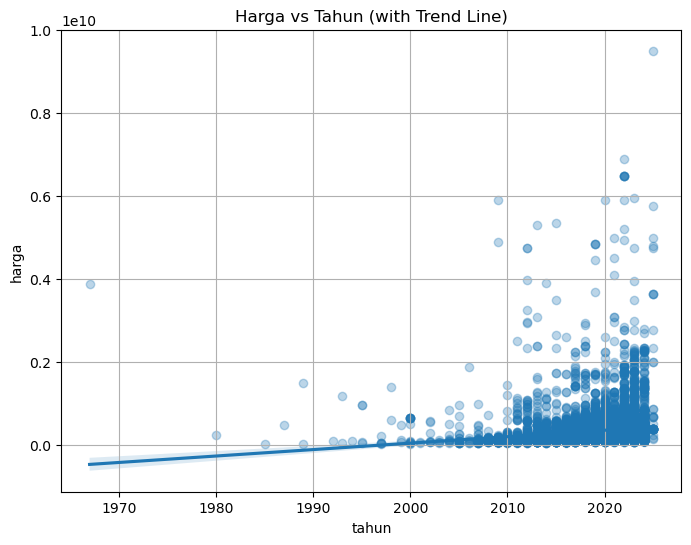

In [74]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x='tahun', y='harga', data=df_reg, scatter_kws={'alpha':0.3})
plt.title('Harga vs Tahun (with Trend Line)')
plt.grid(True)
plt.show()


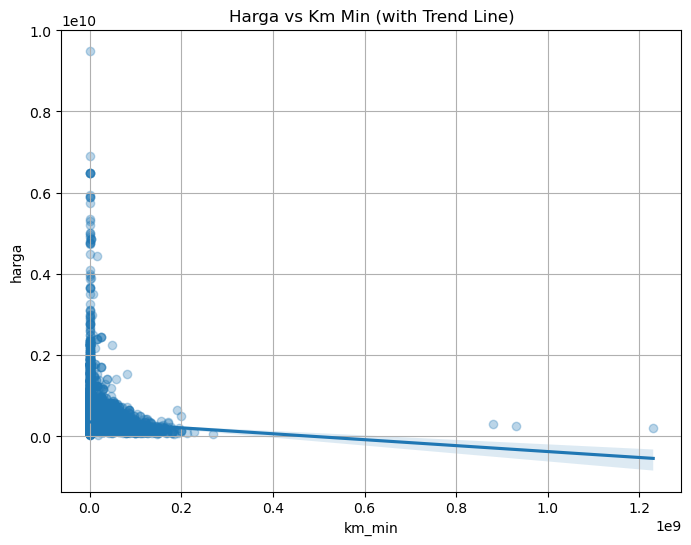

In [85]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x='km_min', y='harga', data=df_reg, scatter_kws={'alpha':0.3})
plt.title('Harga vs Km Min (with Trend Line)')
plt.grid(True)
plt.show()


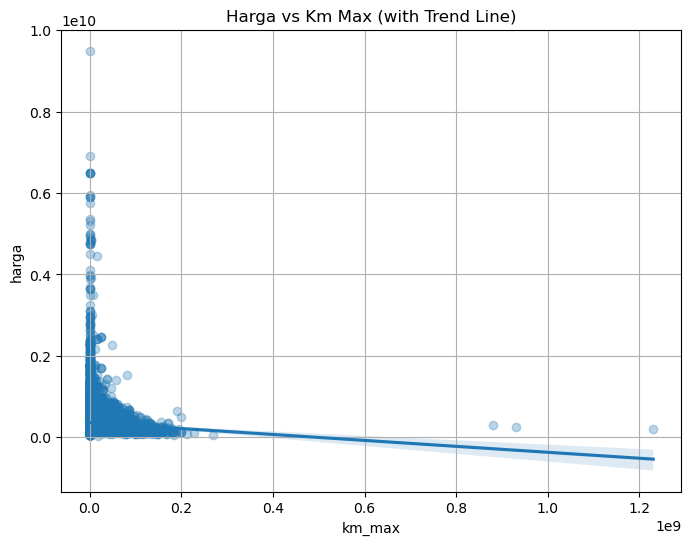

In [86]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x='km_max', y='harga', data=df_reg, scatter_kws={'alpha':0.3})
plt.title('Harga vs Km Max (with Trend Line)')
plt.grid(True)
plt.show()


In [75]:
X = df_reg.drop(columns=['harga','nama_mobil', 'km'])
y = df_reg['harga']


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [77]:
# Tampilkan kolom non-numerik
non_numeric_cols = X_train.select_dtypes(include='object').columns
print(non_numeric_cols)


Index([], dtype='object')


In [78]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [80]:
y_pred = model_rf.predict(X_test)


In [81]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) : {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:,.2f}")
print(f"R-squared (R²) : {r2:.4f}")


Mean Absolute Error (MAE) : 85,994,055.19
Root Mean Squared Error (RMSE) : 245,229,099.30
R-squared (R²) : 0.6115


In [82]:
# Ambil feature importance
importances = model_rf.feature_importances_
feat_importance = pd.DataFrame({
    'Fitur': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance.head(10))


              Fitur  Importance
0             tahun    0.174641
1            km_min    0.107334
2            km_max    0.106707
51  body_type_Coupe    0.093425
36      merk_Nissan    0.051366
4          merk_BMW    0.048881
27        merk_Land    0.047867
33    merk_Mercedes    0.043490
28       merk_Lexus    0.037495
39     merk_Porsche    0.037363


In [83]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_xgb = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


XGBoost Evaluation:
MAE  : 111742049.18
MSE  : 64060132306101184.00
RMSE : 64060132306101184.00
R²   : 0.5861
